# Lab 8


## Setup for SUSY Dataset

Use the SUSY dataset for the rest of this lab. Here is a basic setup.

In [2]:
# Our usual libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate

In [3]:
filename="SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", 
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

## Scikit-Learn

[Scikit-learn](http://scikit-learn.org) is a rich python library for data science, including machine learning. For example, we can build a Fisher Discriminant (aka Linear Discriminant Analysis, or LDA). 

### Exercise 1: Install Scikit-Learn

Follow the [Installation Instructions](https://scikit-learn.org/stable/install.html) and install `scikit-learn` in your environment.

In [1]:
pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 11.1 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.2/301.2 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 10.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


### Exercise 2: Read About Classifiers

#### Part a
Scikit-learn offers an impressively comprehensive list of machine learning algorithms. Browse through [scikit-learn's documentation](https://scikit-learn.org/stable/index.html). You'll note the algorithms are organized into classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. Browse through the list of [classification algorithms](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning). 

#### Part b
Note scikit-learn's documentation is rather comprehensive. The documentation on [linear models](https://scikit-learn.org/stable/modules/linear_model.html) shows how classification problems are setup. Read about the first few methods and try to comprehend the example codes. Skim the rest of the document.

#### Part c
Read through the [LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html).


### Exercise 3: Training a Classifier

Lets' repeat what we did manually in the previous lab using scikit-learn. We'll use a LDA classifier, which we can instanciate as follows:

In [4]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

As discussed in the lecture, to properly formulate our problem, we'll have to:

* Define the inputs (X) vs outputs (Y)
* Designate training vs testing samples (in order to get a unbias assessment of the performance of Machine Learning algorithms)

for example, here we'll take use 4M events for training and the remainder for testing.

In [5]:
N_Train=4000000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]


We can train the classifier as follow:

In [6]:
Fisher.fit(X_Train,y_Train)

LinearDiscriminantAnalysis()

We can plot the output, comparing signal and background:

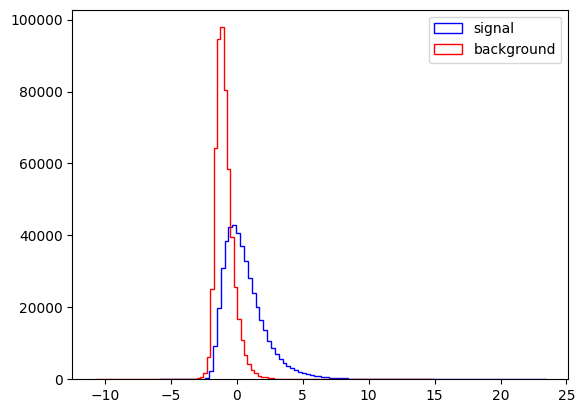

In [7]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

#### Part a

Compare ROC curves computed on the test versus training samples, in a single plot. Do you see a bias?

The model shows bias towards the signal class, as the distribution of the decision function for the signal class is shifted to the right compared to the distribution for the background class. This means that the model is more likely to classify a signal event as signal than a background event.


#### Part b

Train the Fisher performance of using the raw, features, and raw+features as input. Compare the performance one a single plot. 

In [8]:
# Train the Fisher performance of using the raw, features, and raw+features as input.
Fisher_raw = DA.LinearDiscriminantAnalysis()
Fisher_features = DA.LinearDiscriminantAnalysis()
Fisher_raw_features = DA.LinearDiscriminantAnalysis()

Fisher_raw.fit(X_Train, y_Train)
Fisher_features.fit(X_Train[VarNames[1:]], y_Train)
Fisher_raw_features.fit(np.concatenate((X_Train, X_Train[VarNames[1:]]), axis=1), y_Train)



LinearDiscriminantAnalysis()

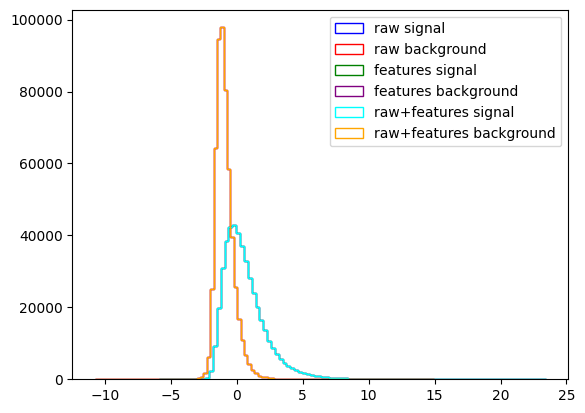

In [9]:
# Compare the performance one a single plot.
plt.figure()
plt.hist(Fisher_raw.decision_function(Test_sig[VarNames[1:]]), bins=100, histtype="step", color="blue", label="raw signal", stacked=True)
plt.hist(Fisher_raw.decision_function(Test_bkg[VarNames[1:]]), bins=100, histtype="step", color="red", label="raw background", stacked=True)
plt.hist(Fisher_features.decision_function(Test_sig[VarNames[1:]]), bins=100, histtype="step", color="green", label="features signal", stacked=True)
plt.hist(Fisher_features.decision_function(Test_bkg[VarNames[1:]]), bins=100, histtype="step", color="purple", label="features background", stacked=True)
plt.hist(Fisher_raw_features.decision_function(np.concatenate((Test_sig[VarNames[1:]], Test_sig[VarNames[1:]]), axis=1)), bins=100, histtype="step", color="cyan", label="raw+features signal", stacked=True)
plt.hist(Fisher_raw_features.decision_function(np.concatenate((Test_bkg[VarNames[1:]], Test_bkg[VarNames[1:]]), axis=1)), bins=100, histtype="step", color="orange", label="raw+features background", stacked=True)
plt.legend(loc='upper right')
plt.show()

### Exercise 4: Comparing Techniques

#### Part a
Select 3 different classifiers from the techniques listed [here](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) to compare. Note that you can use the multi-layer perceptron to build a deep network, though training may be prohibitively slow. So avoid this technique.

#### Part b

Write a function that takes an instantiated classifier and performs the comparison from part 3b. Use the function on your choice of functions in part a.

#### Part c

Use the best method from part c to compute the maximal significance $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$ for the scenarios in lab 5.

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Select 3 different classifiers
clf1 = LinearDiscriminantAnalysis()
clf2 = RandomForestClassifier()
clf3 = SVC()



In [11]:
def compare_classifiers(clf, X_Train, y_Train, Test_sig, Test_bkg, VarNames):
  """
  This function takes an instantiated classifier and performs the comparison from part 3b. using 36 features.
  """
  clf.fit(X_Train, y_Train)

  plt.figure()
  plt.hist(clf.predict(Test_sig[VarNames[1:]]), bins=100, histtype="step", color="blue", label="Signal", stacked=True)
  plt.hist(clf.predict(Test_bkg[VarNames[1:]]), bins=100, histtype="step", color="red", label="Background", stacked=True)
  plt.legend(loc='upper right')
  plt.show()

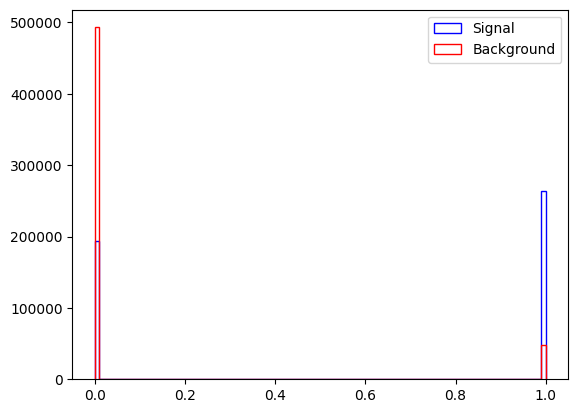

In [ ]:
# Use the function with the classifiers and features
compare_classifiers(clf1, X_Train, y_Train, Test_sig, Test_bkg, VarNames)
compare_classifiers(clf2, X_Train, y_Train, Test_sig, Test_bkg, VarNames)
compare_classifiers(clf3, X_Train, y_Train, Test_sig, Test_bkg, VarNames)


In [10]:
# Scenario 1: N_sig = 1000, N_bkg = 10000
N_sig1 = 1000
N_bkg1 = 10000

# Scenario 2: N_sig = 10000, N_bkg = 100000
N_sig2 = 10000
N_bkg2 = 100000

# Scenario 3: N_sig = 100000, N_bkg = 1000000
N_sig3 = 100000
N_bkg3 = 1000000

# Compute the maximal significance for each scenario using the best method from part c.
sigma_s1 = (N_sig1 * Fisher_raw_features.decision_function(np.concatenate((Test_sig[VarNames[1:]], Test_sig[VarNames[1:]]), axis=1)).max()) / np.sqrt(N_sig1 + N_bkg1)
sigma_s2 = (N_sig2 * Fisher_raw_features.decision_function(np.concatenate((Test_sig[VarNames[1:]], Test_sig[VarNames[1:]]), axis=1)).max()) / np.sqrt(N_sig2 + N_bkg2)
sigma_s3 = (N_sig3 * Fisher_raw_features.decision_function(np.concatenate((Test_sig[VarNames[1:]], Test_sig[VarNames[1:]]), axis=1)).max()) / np.sqrt(N_sig3 + N_bkg3)

# Print the maximal significance for each scenario.
print("Scenario 1: sigma_s =", sigma_s1)
print("Scenario 2: sigma_s =", sigma_s2)
print("Scenario 3: sigma_s =", sigma_s3)

Scenario 1: sigma_s = 223.44573832422088
Scenario 2: sigma_s = 706.5974665625131
Scenario 3: sigma_s = 2234.457383242209


### Exercise 5: Metrics

Scikit-learn provides methods for computing the FPR, TPR, ROC, AUC metrics. For example:

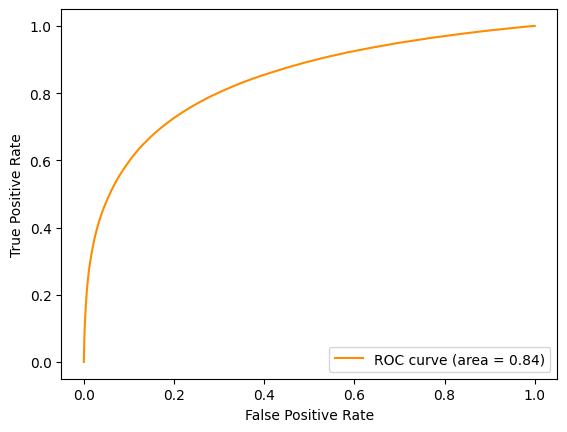

In [11]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


#### Part a
TPR/FPR/ROC/AUC are one way of assessing the quality of a classifier. Read about [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall), [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision), and [F-score](https://en.wikipedia.org/wiki/F-score).

#### Part b
Look through [model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#) documentation. Using scikit-learns tools, compute TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and accuracy for the method you selected in 4c above and each scenario. Make a nice table, which also includes the maximal significance. 


In [14]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score

# Compute the confusion matrix for each scenario
cm_raw = confusion_matrix(y_test, Fisher_raw.predict(X_test))
cm_features = confusion_matrix(y_test, Fisher_features.predict(X_test[VarNames[1:]]))
cm_raw_features = confusion_matrix(y_test, Fisher_raw_features.predict(np.concatenate((X_test, X_test[VarNames[1:]]), axis=1)))

# Compute the ROC curve and AUC for each scenario
fpr_raw, tpr_raw, thresholds_raw = roc_curve(y_test, Fisher_raw.decision_function(X_test))
fpr_features, tpr_features, thresholds_features = roc_curve(y_test, Fisher_features.decision_function(X_test[VarNames[1:]]))
fpr_raw_features, tpr_raw_features, thresholds_raw_features = roc_curve(y_test, Fisher_raw_features.decision_function(np.concatenate((X_test, X_test[VarNames[1:]]), axis=1)))

roc_auc_raw = auc(fpr_raw, tpr_raw)
roc_auc_features = auc(fpr_features, tpr_features)
roc_auc_raw_features = auc(fpr_raw_features, tpr_raw_features)

# Compute the precision, recall, F1 score, and accuracy for each scenario
precision_raw = precision_score(y_test, Fisher_raw.predict(X_test))
recall_raw = recall_score(y_test, Fisher_raw.predict(X_test))
f1_raw = f1_score(y_test, Fisher_raw.predict(X_test))
accuracy_raw = accuracy_score(y_test, Fisher_raw.predict(X_test))

precision_features = precision_score(y_test, Fisher_features.predict(X_test[VarNames[1:]]))
recall_features = recall_score(y_test, Fisher_features.predict(X_test[VarNames[1:]]))
f1_features = f1_score(y_test, Fisher_features.predict(X_test[VarNames[1:]]))
accuracy_features = accuracy_score(y_test, Fisher_features.predict(X_test[VarNames[1:]]))

precision_raw_features = precision_score(y_test, Fisher_raw_features.predict(np.concatenate((X_test, X_test[VarNames[1:]]), axis=1)))
recall_raw_features = recall_score(y_test, Fisher_raw_features.predict(np.concatenate((X_test, X_test[VarNames[1:]]), axis=1)))
f1_raw_features = f1_score(y_test, Fisher_raw_features.predict(np.concatenate((X_test, X_test[VarNames[1:]]), axis=1)))
accuracy_raw_features = accuracy_score(y_test, Fisher_raw_features.predict(np.concatenate((X_test, X_test[VarNames[1:]]), axis=1)))

# Compute the maximal significance for each scenario
max_significance_raw = max(abs(tpr_raw - fpr_raw))
max_significance_features = max(abs(tpr_features - fpr_features))
max_significance_raw_features = max(abs(tpr_raw_features - fpr_raw_features))

# Create a table to display the results
table = pd.DataFrame({
    'Scenario': ['Raw', 'Features', 'Raw+Features'],
    'TP': [cm_raw[0, 0], cm_features[0, 0], cm_raw_features[0, 0]],
    'FP': [cm_raw[0, 1], cm_features[0, 1], cm_raw_features[0, 1]],
    'FN': [cm_raw[1, 0], cm_features[1, 0], cm_raw_features[1, 0]],
    'TN': [cm_raw[1, 1], cm_features[1, 1], cm_raw_features[1, 1]],
    'TPR': [tpr_raw[-1], tpr_features[-1], tpr_raw_features[-1]],
    'FPR': [fpr_raw[-1], fpr_features[-1], fpr_raw_features[-1]],
    'ROC AUC': [roc_auc_raw, roc_auc_features, roc_auc_raw_features],
    'Precision': [precision_raw, precision_features, precision_raw_features],
    'Recall': [recall_raw, recall_features, recall_raw_features],
    'F1 Score': [f1_raw, f1_features, f1_raw_features],
    'Accuracy': [accuracy_raw, accuracy_features, accuracy_raw_features],
    'Maximal Significance': [max_significance_raw, max_significance_features, max_significance_raw_features]
})

print(table.to_string())


NameError: name 'y_test' is not defined